## GOAL
Load helper functions for plots and simulation.


### What you should notice
We use the same helpers to keep each section short and visual.


In [ ]:
# Helper functions for visualization and simulation.
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

def show_circuit(circuit):
    """Show a circuit diagram (mpl if available, else text)."""
    try:
        return circuit.draw('mpl')
    except Exception:
        print(circuit)

def show_bloch(circuit):
    """Show Bloch sphere for a 1-qubit circuit state."""
    state = Statevector.from_instruction(circuit)
    return plot_bloch_multivector(state)

def run_and_plot_counts(circuit, shots=1024):
    """Run a circuit on a simple simulator and plot counts."""
    try:
        from qiskit.primitives import StatevectorSampler
        sampler = StatevectorSampler()
    except Exception:
        from qiskit.primitives import Sampler
        sampler = Sampler()
    result = sampler.run([circuit], shots=shots).result()
    quasi = result.quasi_dists[0]
    counts = {k: int(v * shots) for k, v in quasi.items()}
    print("Counts:", counts)
    return plot_histogram(counts)

from qiskit import QuantumCircuit


## EXERCISE
No exercise here. Continue to the next cell.


In [ ]:
# Student solution cell (optional).


## GOAL
Understand the X gate (bit flip).


### What you should notice
X flips |0> to |1> and |1> to |0>.


In [ ]:
# X gate demo.
qc_x = QuantumCircuit(1, 1)
qc_x.x(0)
qc_x.measure(0, 0)
show_circuit(qc_x)
run_and_plot_counts(qc_x)


## EXERCISE
Predict the result before running.


In [ ]:
# Student solution cell (optional).


## GOAL
Understand the H gate (superposition).


### What you should notice
H makes a 50/50 measurement in the Z basis.


In [ ]:
# H gate demo.
qc_h = QuantumCircuit(1, 1)
qc_h.h(0)
qc_h.measure(0, 0)
show_circuit(qc_h)
run_and_plot_counts(qc_h)


## EXERCISE
Predict the result of H then H.


In [ ]:
# Student solution cell (optional).


## GOAL
Understand the Z gate (phase flip).


### What you should notice
Z is invisible on |0> but visible after H (H-Z-H shows it).


In [ ]:
# Z gate demo using H-Z-H.
qc_z = QuantumCircuit(1, 1)
qc_z.h(0)
qc_z.z(0)
qc_z.h(0)
qc_z.measure(0, 0)
show_circuit(qc_z)
run_and_plot_counts(qc_z)


## EXERCISE
Explain why Z appears only with H-Z-H.


In [ ]:
# Student solution cell (optional).


## GOAL
Understand the CX gate (controlled X).


### What you should notice
The target flips only when the control is |1>.


In [ ]:
# CX gate demo.
qc_cx = QuantumCircuit(2, 2)
qc_cx.x(0)
qc_cx.cx(0, 1)
qc_cx.measure([0, 1], [0, 1])
show_circuit(qc_cx)
run_and_plot_counts(qc_cx)


## EXERCISE
Predict counts if the control stays in |0>.


In [ ]:
# Student solution cell (optional).


## GOAL
Encrypt and decrypt a qubit using X^a Z^b (QOTP).


### What you should notice
Decryption recovers the original state for any key (a,b).


In [ ]:
# QOTP demo.
import random
from qiskit.quantum_info import Statevector

a = random.randint(0, 1)
b = random.randint(0, 1)
print("Key bits a, b:", a, b)

qc = QuantumCircuit(1)
qc.h(0)  # start with |+>
original = Statevector.from_instruction(qc)

if a == 1:
    qc.x(0)
if b == 1:
    qc.z(0)

if b == 1:
    qc.z(0)
if a == 1:
    qc.x(0)

final = Statevector.from_instruction(qc)
fidelity = abs(original.data.conjugate().dot(final.data)) ** 2
print("Fidelity:", fidelity)


## EXERCISE
Try all four keys (a,b). Then switch the input to |1>.


In [ ]:
# Student solution cell (optional).


## Interference — the key “quantum-only” idea (after superposition)

### 1) What does **interference** mean?
When a qubit is in **superposition**, it is like we have **two computation paths at the same time**.

- Each path has an **amplitude** (a complex number).
- When we apply gates, amplitudes can **add** or **subtract**.
- This add/subtract is called **interference**.

**Key point**
- Quantum probabilities come from amplitudes.
- Amplitudes can **reinforce** (constructive interference) or **cancel** (destructive interference).
- This is different from classical probability, where probabilities only **add**.

---

### 2) The simplest interference demo: $H \rightarrow H$
Start with the qubit in $|0\rangle$.

Apply $H$:

$$
H|0\rangle = |+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}
$$

Now we have “two paths” toward outcomes 0 and 1.

Apply $H$ again:

$$
H|+\rangle = |0\rangle
$$

**What students observe**
- If we measure after $H$ then $H$, we get almost always **0** (ideal simulator).

**Why?**
- The “paths” to $|1\rangle$ cancel out exactly.
- That cancellation is **destructive interference**.

---

### 3) Make interference visible using a phase flip: $H \rightarrow Z \rightarrow H$
Now do:

$$
|0\rangle \xrightarrow{H} |+\rangle \xrightarrow{Z} |-\rangle \xrightarrow{H} |1\rangle
$$

Where:

$$
|-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}
$$

**What students observe**
- If we measure after $H \rightarrow Z \rightarrow H$, we get almost always **1** (ideal simulator).

**What changed?**
The $Z$ gate changes the **phase** of the $|1\rangle$ part:

- $|0\rangle$ stays the same  
- $|1\rangle$ gets a minus sign (phase $\pi$)

That minus sign changes how amplitudes combine after the final $H$.
So instead of canceling $|1\rangle$, the circuit cancels $|0\rangle$.

**Clean beginner sentence**
> $Z$ does not change the measurement results by itself, but it changes interference when we mix states again using $H$.

---

### 4) “Two paths” explanation (easy to say in class)
After the first $H$, we have two paths:

- Path A: through $|0\rangle$
- Path B: through $|1\rangle$

Before the second $H$:
- With $H \rightarrow H$: the paths add to give output **0**, and cancel to give output **1**.
- With $H \rightarrow Z \rightarrow H$: one path gets a minus sign, so cancellation switches and output **1** survives.

So:
- **Phase controls interference**
- **Interference controls probabilities**

---

### 5) Why classical probability can’t do this
In classical probability:
- If there are two ways to get an outcome, probabilities only add.
- You never get “two ways cancel each other.”

In quantum:
- We add amplitudes first, then compute probability:

$$
P = |\text{amplitude}|^2
$$

That is why cancellation is possible.

---

### 6) Why interference matters (motivation)
Interference is the engine behind many quantum algorithms:

- **Grover’s algorithm**: increases amplitudes of correct answers and reduces others via interference.
- **Shor’s algorithm**: uses interference to reveal periodic structure.
- **Quantum Fourier Transform (QFT)**: uses interference to extract frequency/phase information.

**Beginner takeaway**
> Quantum algorithms work because they create superposition, apply phases, then use interference to amplify good answers and cancel bad ones.


H → H {'0': 500}


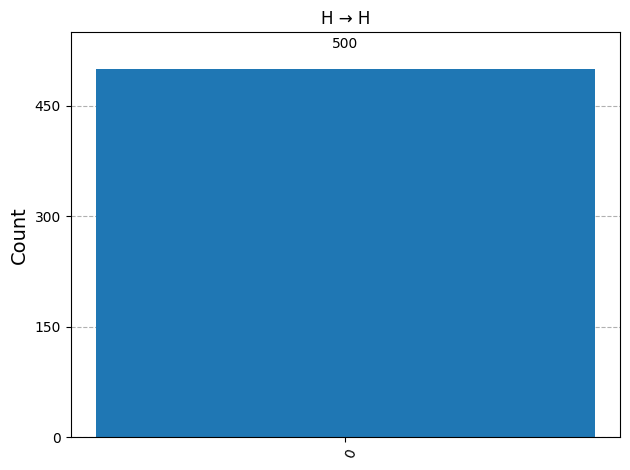

H → Z → H {'1': 500}


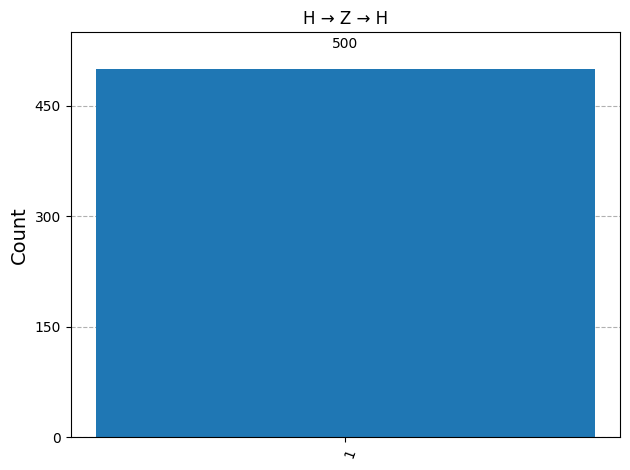

In [7]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline



sampler = StatevectorSampler()

def run_and_plot(qc, title, shots=500):
    """Run a circuit with StatevectorSampler and plot a histogram."""
    result = sampler.run([qc], shots=shots).result()
    counts = result[0].data.meas.get_counts()  # <-- use 'meas'
    print(title, counts)
    plot_histogram(counts, title=title)
    plt.show()

# 1) H then H  (interference cancels |1> -> should be mostly 0)
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.h(0)
qc1.measure_all()

run_and_plot(qc1, "H → H", shots=500)

# 2) H then Z then H  (phase flip changes interference -> should be mostly 1)
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.z(0)
qc2.h(0)
qc2.measure_all()

run_and_plot(qc2, "H → Z → H", shots=500)
